In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extinction import add_colors_and_abs_mag, correct_flux_excess_factor
from download_isochrone import load_isochrone
from simbad_download import resolve_name

Configuration file not found:

    /home/mjablons/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


# CMD diagram

In [2]:
CLUSTER_NAME: str = 'NGC 188'

In [3]:
cp_ra, cp_dec, cp_par, cp_pmra, cp_pmdec, cp_radvel = resolve_name(CLUSTER_NAME)

In [4]:
isochrone: np.ndarray = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [10]:
clustered: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
not_found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_not_found.csv')
lit: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_literature.csv')

## Total mass

In [16]:
lit.link_bibcode.unique()

array(['2018AJ....156..142D', '2018A&A...616A..10G',
       '2020A&A...640A...1C', '2008AJ....135.2264G',
       '2019A&A...624A...8A', '2011AJ....142...59J',
       '2004PASP..116.1012S', '2003AJ....126.2922P',
       '2013AJ....146..133M'], dtype=object)

In [8]:
found.head()

,Unnamed: 0,EDR3 id,reported,TIC,solution_id,designation,source_id,random_index,ref_epoch,ra,...,A_y,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,occurences
0,3,5.735490e+17,6,461598969.0,1636148068921376768,Gaia DR3 573549009293487360,573549009293487360,117320301,2016.0,9.938466,...,0.430683,0.270311,0.159929,0.103187,0.900436,0.001336,3.121463,0.078422,0.010921,1.0
1,4,5.735499e+17,4,NaN,1636148068921376768,Gaia DR3 573549932709068416,573549932709068416,349334707,2016.0,12.411280,...,0.587295,0.368605,0.218085,0.140709,1.039341,0.011332,5.136995,0.286409,0.003433,1.0
2,7,5.735518e+17,1,461600895.0,1636148068921376768,Gaia DR3 573551822494228096,573551822494228096,438527372,2016.0,12.046733,...,0.587295,0.368605,0.218085,0.140709,0.691142,0.002300,3.036034,0.114827,0.018542,0.9
3,8,5.735527e+17,4,NaN,1636148068921376768,Gaia DR3 573552651425754240,573552651425754240,1610097616,2016.0,11.786204,...,0.587295,0.368605,0.218085,0.140709,1.012521,0.012866,5.616945,0.234869,0.001471,1.0
4,10,5.735542e+17,1,461600900.0,1636148068921376768,Gaia DR3 573554231973717632,573554231973717632,236110269,2016.0,11.132328,...,0.587295,0.368605,0.218085,0.140709,0.700190,0.003143,3.982987,0.105812,0.014973,1.0


In [17]:
not_found = pd.merge(not_found, lit[['EDR3 id', 'link_bibcode']], on='EDR3 id')

In [21]:
not_found[not_found.occurences==0.0]['link_bibcode'].value_counts()

2008AJ....135.2264G    43
2018AJ....156..142D    11
2018A&A...616A..10G    10
2013AJ....146..133M     1
Name: link_bibcode, dtype: int64

In [93]:
clustered = add_colors_and_abs_mag(clustered)
found = add_colors_and_abs_mag(found)
not_found = add_colors_and_abs_mag(not_found)

<IPython.core.display.Javascript object>


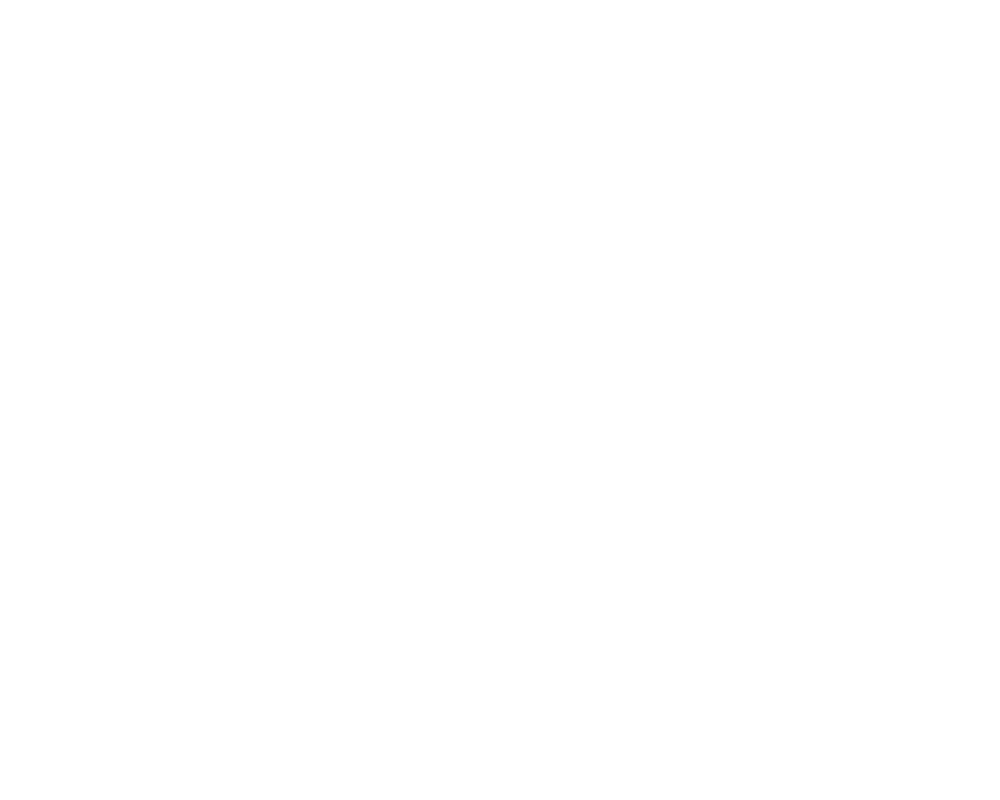

In [94]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(found['BP-RP'], found['G_abs'], color='royalblue', label='literature sources')
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);

# Not found?

In [95]:
print(f'{len(not_found[not_found.occurences==0.0])} literature sources were not clustered.')

65 literature sources were not clustered.


In [96]:
plt.hist(not_found.occurences);

<IPython.core.display.Javascript object>


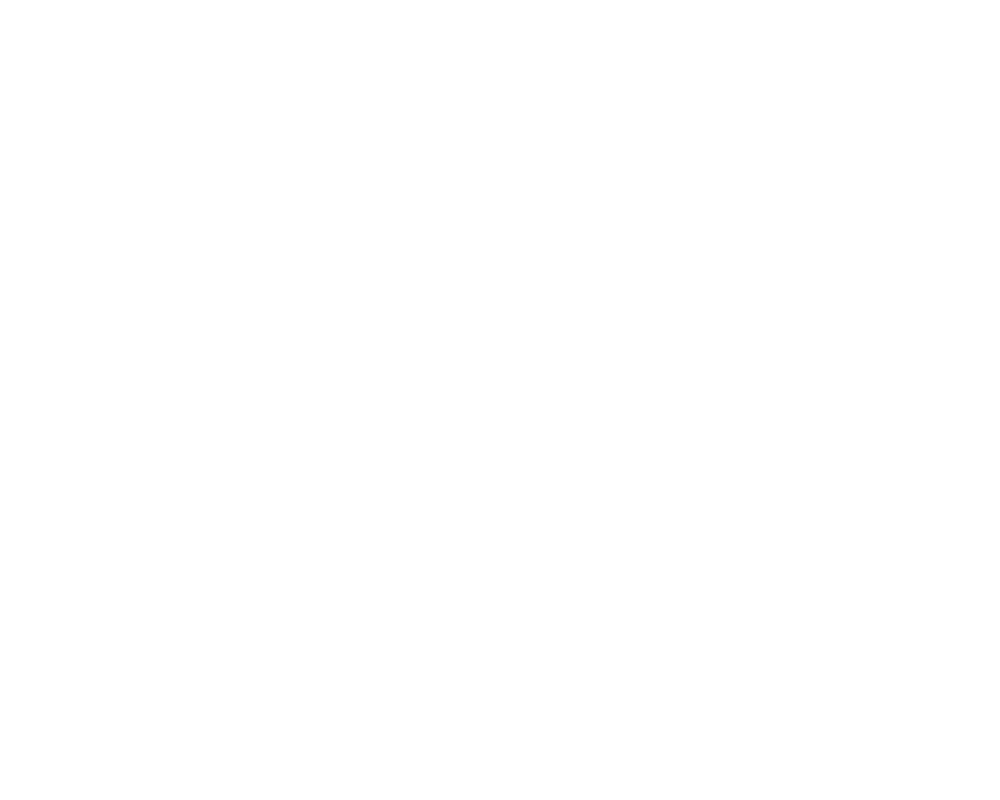

In [97]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(not_found['BP-RP'], not_found['G_abs'], color='royalblue',
            label='missed literature sources', alpha=1-not_found['occurences'])
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
lgnd = plt.legend(fontsize=16);
for handle in lgnd.legendHandles:
    handle._alpha = 1.;

In [98]:
def found_vs_not_found_hist(found: pd.DataFrame,
                            not_found: pd.DataFrame,
                            prop: str):
    plt.figure(figsize=(8, 5))
    plt.hist(found[prop], color='royalblue', alpha=0.5, label='Found literature sources', density=True, bins=50)
    plt.hist(not_found[prop], color='tomato', alpha=0.5, label='Missed literature sources', density=True, bins=20)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16);

In [99]:
def found_vs_not_found_hist_xlines(found: pd.DataFrame,
                                   not_found_values: list,
                                   prop: str):
    plt.figure(figsize=(8, 5))
    plt.hist(found[prop], color='royalblue', label='Found literature sources', density=True, bins=50)
    for val in not_found_values:
        plt.axvline(x=val, linestyle='--', color='black', linewidth=2)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16)

In [100]:
def not_found_hist(not_found: pd.DataFrame,
                   prop: str,
                   threshold: float = None):
    plt.figure(figsize=(8, 5))
    plt.hist(not_found[prop], color='tomato', label='Missed literature sources', density=True, bins=20)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16);
    if threshold:
        plt.axvline(x=threshold, linestyle='--', color='black', linewidth=2)

In [101]:
%matplotlib notebook

<IPython.core.display.Javascript object>


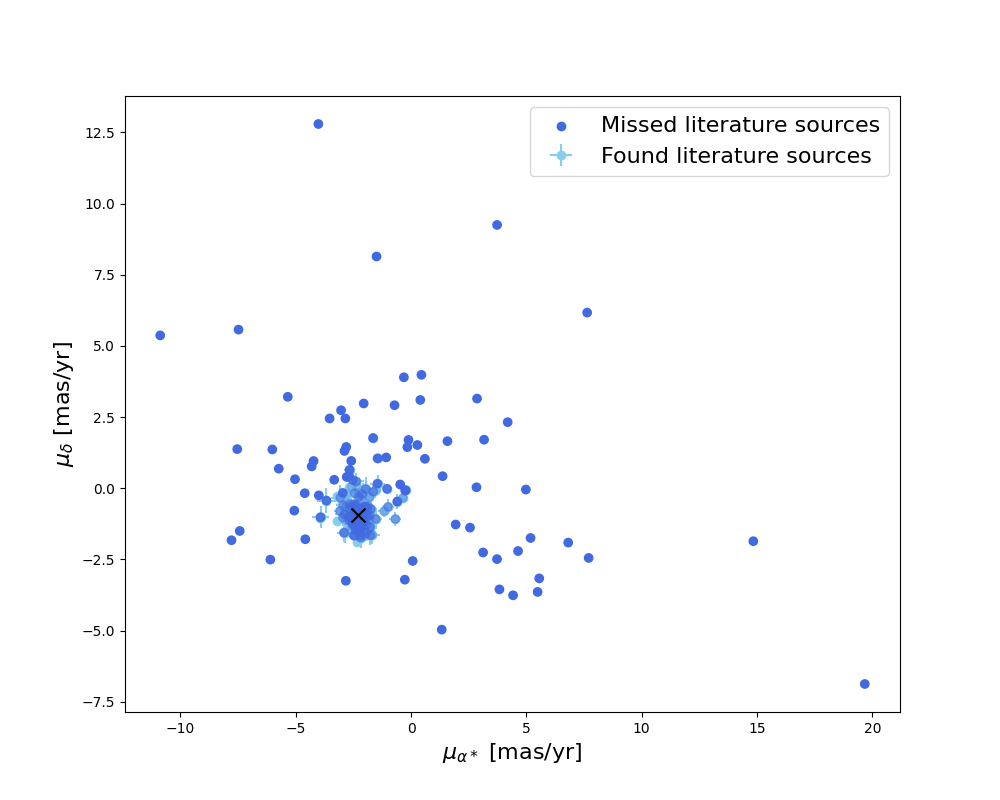

In [102]:
plt.figure(figsize=(10, 8))
plt.errorbar(found.pmra, found.pmdec, xerr=found.pmra_error,
             yerr=found.pmdec_error, color='skyblue', fmt='o', zorder=0,
             label='Found literature sources')
plt.scatter(not_found.pmra, not_found.pmdec, alpha=1-not_found.occurences, color='royalblue', zorder=1,
             label='Missed literature sources')

plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=2)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
lgnd = plt.legend(fontsize=16);
for handle in lgnd.legendHandles:
    handle._alpha = 1.;

In [106]:
tot_not_found = not_found[not_found.occurences==0]
PMRA_STD = np.std(np.abs(found.pmra-cp_pmra))
PMDEC_STD = np.std(np.abs(found.pmdec-cp_pmdec))

correct_pm_mask = (np.abs(tot_not_found.pmra-cp_pmra)<=6*PMRA_STD) & (np.abs(tot_not_found.pmdec-cp_pmdec)<=6*PMDEC_STD)
len(tot_not_found[correct_pm_mask])
correct_pm = tot_not_found[correct_pm_mask]

<IPython.core.display.Javascript object>


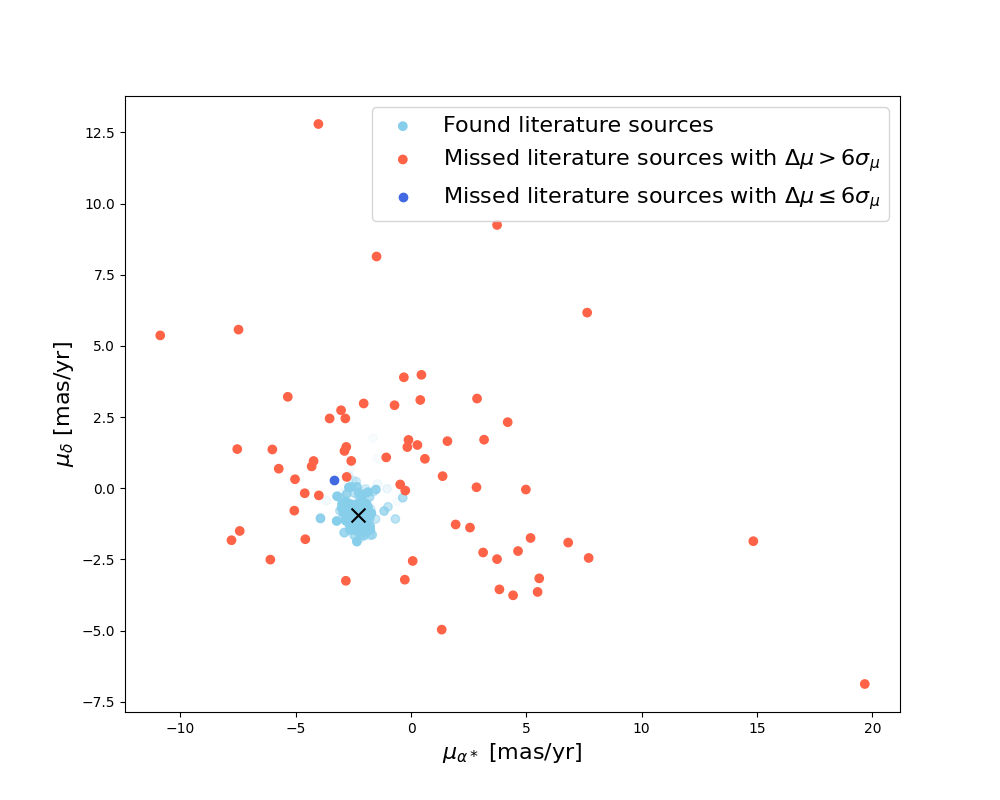

In [108]:
plt.figure(figsize=(10, 8))
plt.scatter(found.pmra, found.pmdec, color='skyblue', zorder=1, alpha=found.occurences,
             label='Found literature sources')
plt.scatter(tot_not_found[~correct_pm_mask].pmra, tot_not_found[~correct_pm_mask].pmdec,
            alpha=1-tot_not_found[~correct_pm_mask].occurences, color='tomato', zorder=2,
            label='Missed literature sources with $\Delta\mu>6\sigma_\mu$')

plt.scatter(correct_pm.pmra, correct_pm.pmdec,
            alpha=1-correct_pm.occurences,
            color='royalblue', zorder=2,
             label='Missed literature sources with $\Delta\mu\leq6\sigma_\mu$')

plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=3)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
plt.legend(fontsize=16);

<IPython.core.display.Javascript object>


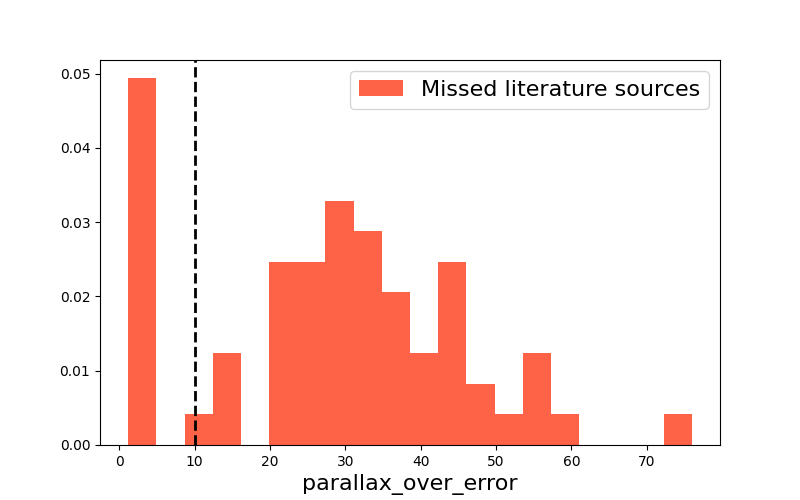

In [74]:
not_found_hist(tot_not_found, 'parallax_over_error', 10.0);

<IPython.core.display.Javascript object>


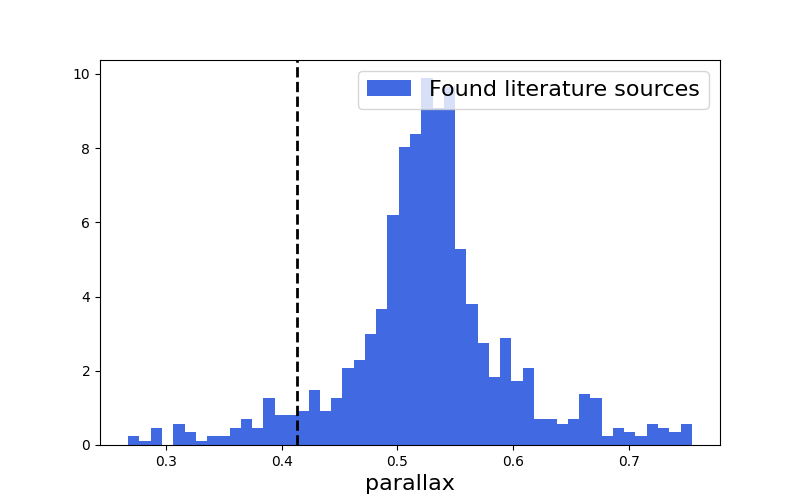

In [77]:
found_vs_not_found_hist_xlines(found, tot_not_found[correct_pm_mask].parallax.values, 'parallax')

<IPython.core.display.Javascript object>


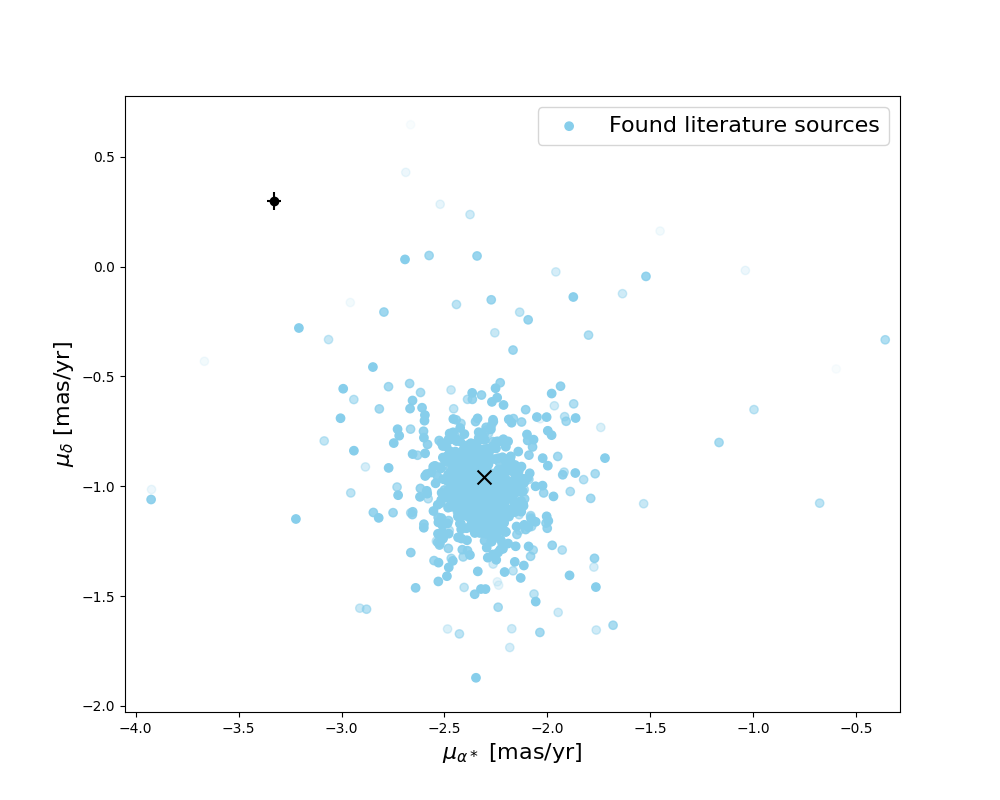

In [81]:
plt.figure(figsize=(10, 8))
plt.scatter(found.pmra, found.pmdec, color='skyblue', zorder=1, alpha=found.occurences,
             label='Found literature sources')

plt.errorbar(tot_not_found[correct_pm_mask].pmra, tot_not_found[correct_pm_mask].pmdec, fmt='o',
             xerr=tot_not_found[correct_pm_mask].pmra_error, yerr=tot_not_found[correct_pm_mask].pmdec_error,
             color='black')

plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=3)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
plt.legend(fontsize=16);

<IPython.core.display.Javascript object>


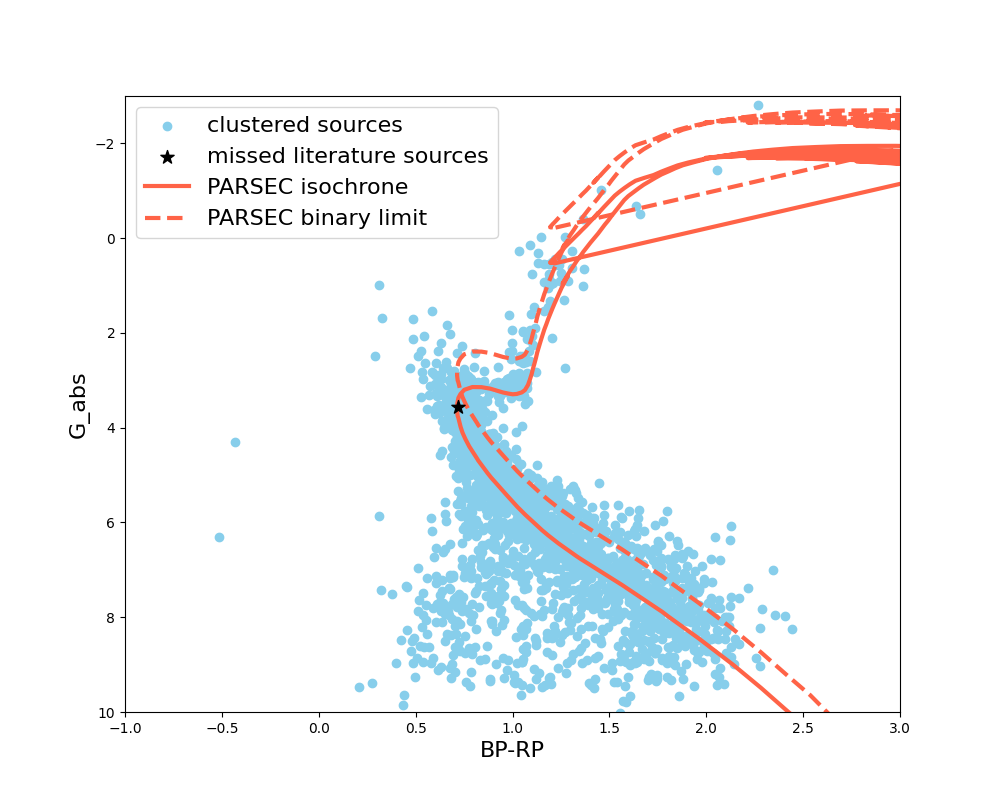

In [82]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue',
            label='clustered sources');
plt.scatter(tot_not_found[correct_pm_mask]['BP-RP'], tot_not_found[correct_pm_mask]['G_abs'], color='black',
            label='missed literature sources', zorder=3, marker='*', s=100)
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato',
         linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato',
         linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);